#**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Analisis Data dan EDA
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Model Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

# Validasi Model dan Tuning
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats  # SciPy untuk fungsi-fungsi statistik

# **Project Overview** <br/>
**Dataset Description**<br/>

* **Ukuran**: Dataset ini memiliki 558.837 observasi (titik data).
* **Fitur** (16 total):

  * **Fitur Kuantitatif (Fitur dengan nilai numerik):**
    * **year** (int64): Tahun pembuatan kendaraan.
    * **condition** (float64):Kondisi kendaraan (kemungkinan pada skala numerik).
    * **odometer** (float64): Jarak tempuh kendaraan.

    * **mmr** (float64): Nilai Manheim Market Report (perkiraan nilai pasar).
    * **sellingprice** (float64): Harga akhir saat kendaraan dijual.

  * **Fitur Kualitatif (Fitur dengan nilai kategoris):**
    * **make** (object): Merek/pabrikan kendaraan.
    * **model** (object): Model spesifik kendaraan.
    * **trim** (object): Spesifikasi tambahan dalam model.
    * **body** (object):  Jenis bodi kendaraan (misalnya, Sedan, SUV, dll.).
    * **transmission** (object):Jenis transmisi (misalnya, automatic, manual).
    * **vin** (object): Nomor Identifikasi Kendaraan yang unik.
    * **state** (object): Negara bagian tempat kendaraan terdaftar.
    * **color** (object): Warna eksterior kendaraan.
    * **interior** (object): Warna interior kendaraan.
    * **seller** (object): Entitas yang menjual kendaraan.
    * **saledate** (object): Tanggal dan waktu penjualan.
    
**Notes**

* year dan saledate harus diubah ke format datetime untuk analisis yang lebih mudah.

# **Exploratory Data Analysis**

In [ ]:
car_prices_df = pd.read_csv('/content/drive/MyDrive/Bootcamp/DigitalSkola/final/car_prices.csv')
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
car_prices_df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
car_prices_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
car_prices_df.shape

(558837, 16)

In [ ]:
car_prices_df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
car_prices_df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [ ]:
df = car_prices_df.copy()
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
df.nunique()

year                34
make                66
model              851
trim              1888
body                46
transmission         3
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

0

#**Data Cleaning**

In [ ]:
kolom_object = df.select_dtypes(include=['object']).columns

for kolom in kolom_object:
    df[kolom] = df[kolom].str.lower()

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,tue dec 16 2014 12:30:00 gmt-0800 (pst)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,tue dec 16 2014 12:30:00 gmt-0800 (pst)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,thu jan 15 2015 04:30:00 gmt-0800 (pst)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,thu jan 29 2015 04:30:00 gmt-0800 (pst)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,thu dec 18 2014 12:30:00 gmt-0800 (pst)


In [ ]:
df = df.replace('—', np.nan)
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color           25434
interior        17826
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

#### Columns Transmission

In [ ]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            26
Name: count, dtype: int64

In [ ]:
df = df[df['transmission'] != 'sedan']

In [ ]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
Name: count, dtype: int64

In [ ]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 0
state               0
condition       11794
odometer           94
color           25434
interior        17825
seller              0
mmr                12
sellingprice       12
saledate           12
dtype: int64

In [ ]:
df.dropna(subset=['sellingprice'], inplace=True)

In [ ]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 0
state               0
condition       11794
odometer           94
color           25434
interior        17824
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df.dropna(subset=['body'], inplace=True)
df.isna().sum()

year                0
make                0
model              98
trim                0
body                0
transmission    63188
vin                 0
state               0
condition       11200
odometer           85
color           25179
interior        17136
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
tes = df.copy()

In [ ]:
tes.dropna(subset=['trim'], inplace=True)
tes.isna().sum()

year                0
make                0
model              98
trim                0
body             2544
transmission    63556
vin                 0
state               0
condition       11635
odometer           88
color           25217
interior        17390
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
tes.dropna(subset=['color'], inplace=True)
tes.isna().sum()

year               0
make               0
model             92
trim               0
body               0
transmission       0
vin                4
state              0
condition       9459
odometer          55
color            581
interior         581
seller             0
mmr               37
sellingprice      11
saledate          11
dtype: int64

In [ ]:
df['model'] = df['model'].fillna('other')
df['color'] = df['color'].fillna('other')
df['interior'] = df['interior'].fillna('other')

df['body'] = df['body'].fillna(df['body'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])


In [ ]:
df.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11200
odometer           85
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df.nunique()

year                34
make                66
model              851
trim              1887
body                45
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               19
interior            16
seller           14261
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [ ]:
df['make'] = np.where(df['make'].map(df['make'].value_counts()) < 200, 'other', df['make'])
df['state'] = np.where(df['state'].map(df['state'].value_counts()) < 200, 'other', df['state'])
df['body'] = np.where(df['body'].map(df['body'].value_counts()) < 200, 'other', df['body'])
df['color'] = np.where(df['color'].map(df['color'].value_counts()) < 200, 'other', df['color'])
df['interior'] = np.where(df['interior'].map(df['interior'].value_counts()) < 200, 'other', df['interior'])

df.nunique()

year                26
make                42
model              773
trim              1497
body                24
transmission         2
vin             537297
state               35
condition           41
odometer        169364
color               18
interior            14
seller           14002
mmr               1101
sellingprice      1873
saledate          3712
dtype: int64

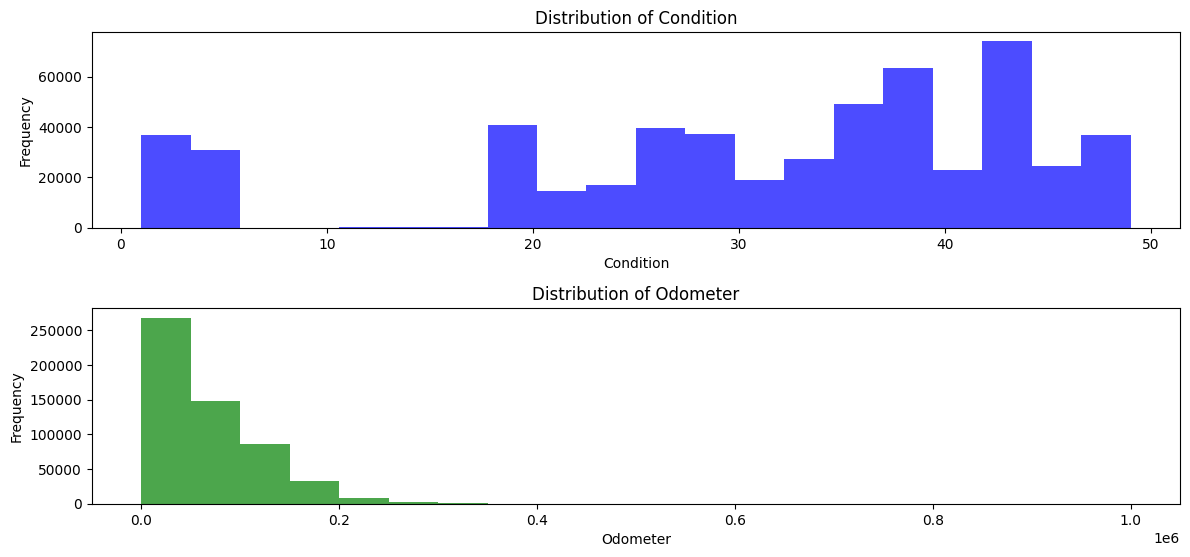

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histogram untuk 'condition'
plt.subplot(3, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram untuk 'odometer'
plt.subplot(3, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Visualisasikan distribusi nilai pada kolom 'kondisi', 'odometer', dan 'mmr'. Puncak dan bentuk histogram akan memberikan wawasan tentang di mana sebagian besar nilai berada.

In [ ]:
df.isna().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11200
odometer           85
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)

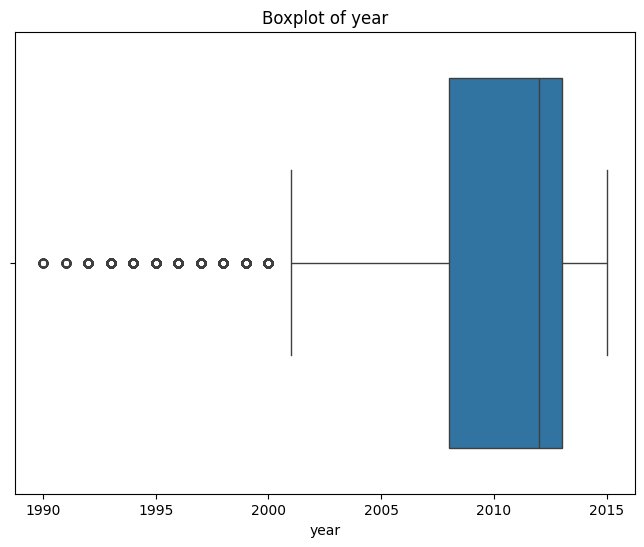

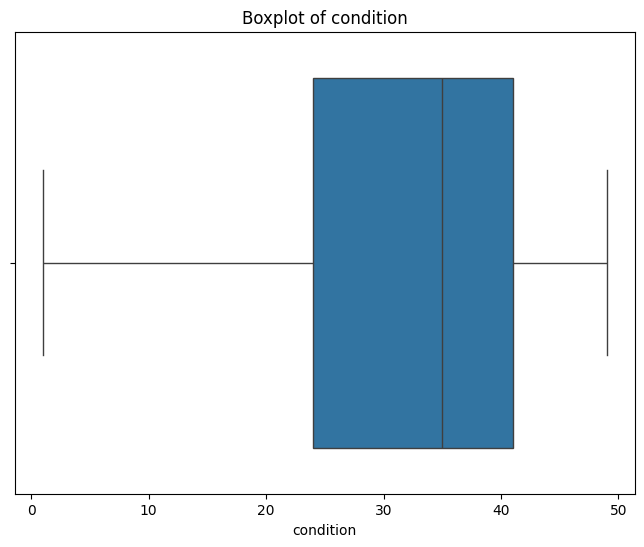

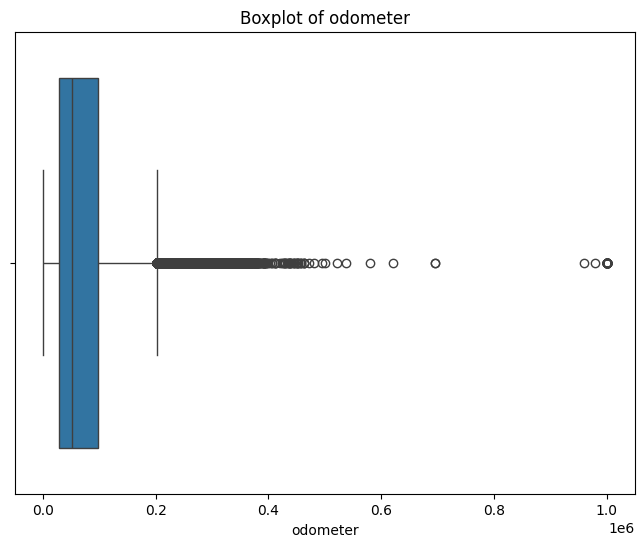

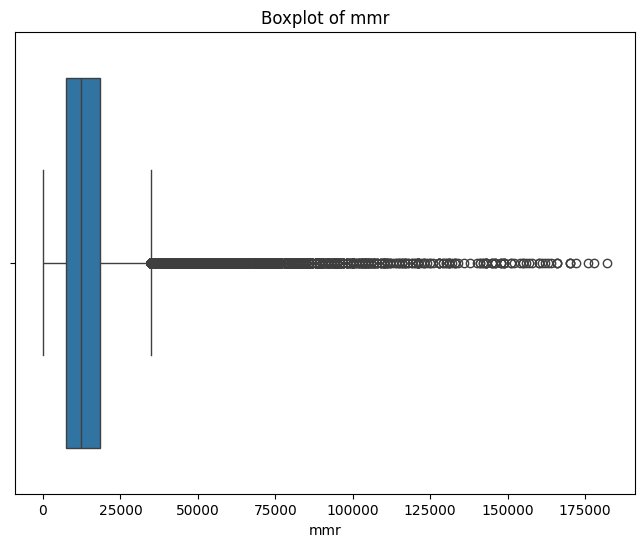

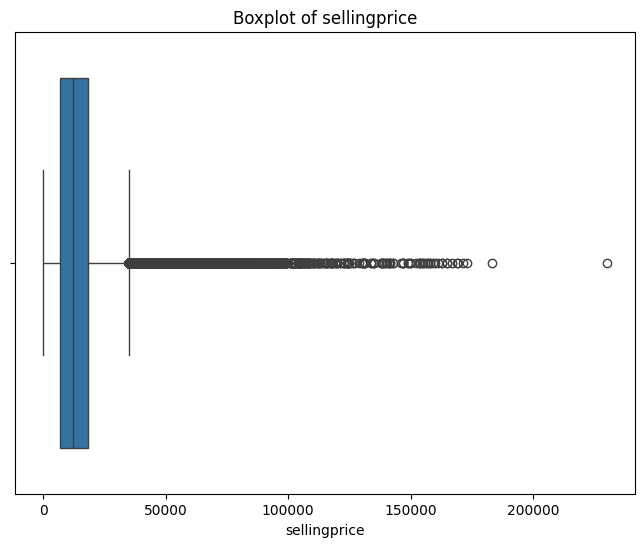

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title('Boxplot of ' + col)
    plt.show()


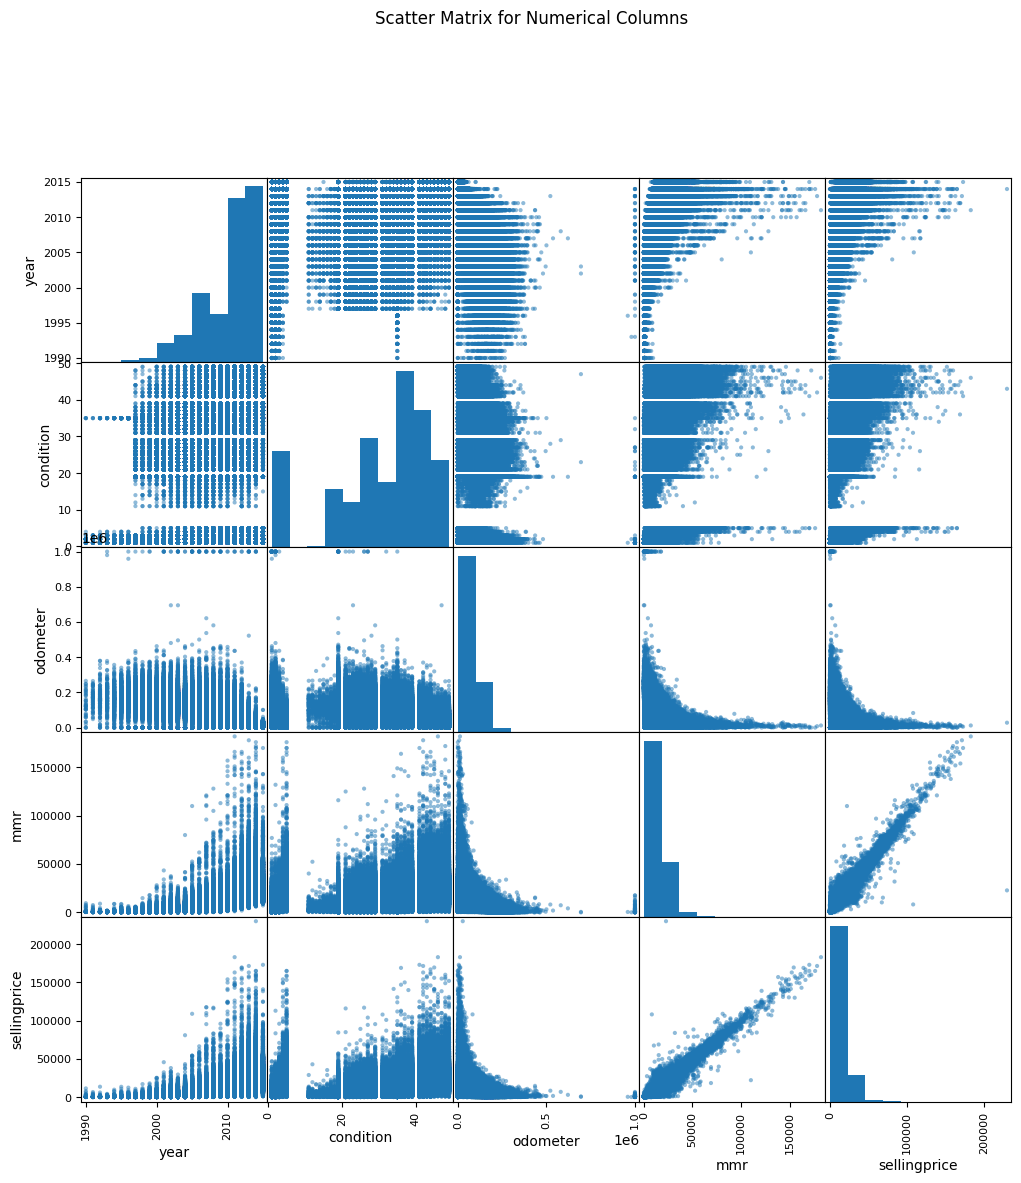

In [ ]:
scatter_matrix(df[numerical_cols], alpha=0.5, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix for Numerical Columns', y=1.02)
plt.show()

**Understand the Impact**

Sebelum menghapus outlier, sangat penting untuk memahami dampaknya terhadap analisis atau model Anda. outlier mungkin mengandung informasi berharga atau mengindikasikan pola tertentu dalam data Anda. Selalu pertimbangkan konteks data Anda dan tujuan analisis atau pemodelan sebelum memutuskan untuk menghapus outlier.

In [ ]:
import numpy as np

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

k = 8  # Koefisien untuk outlier ekstrem

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    clean_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

clean_df.shape

(545482, 16)

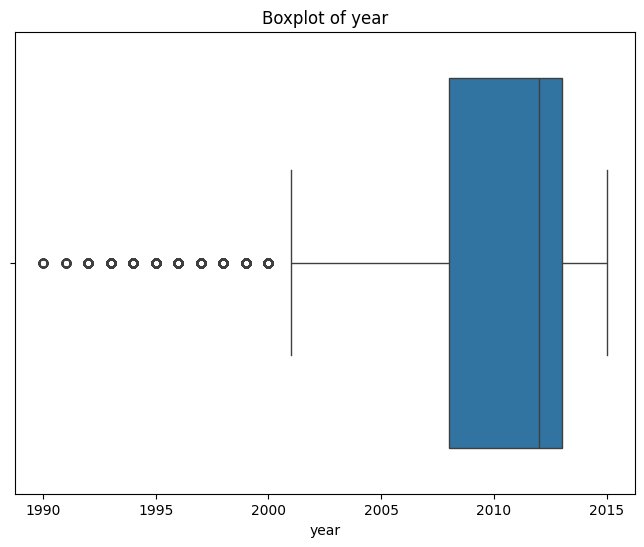

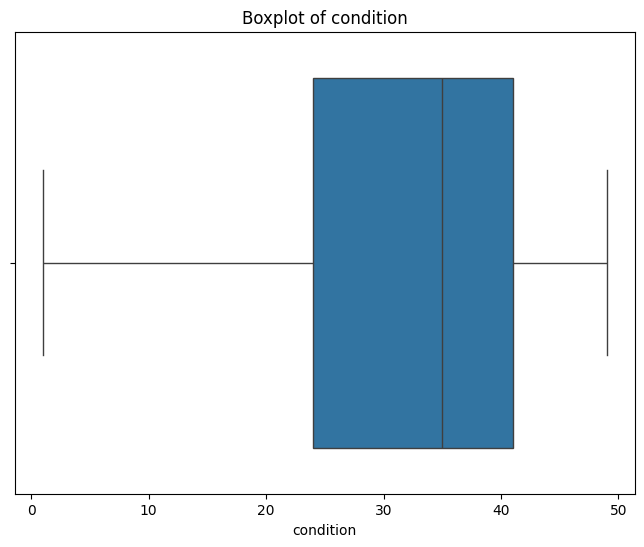

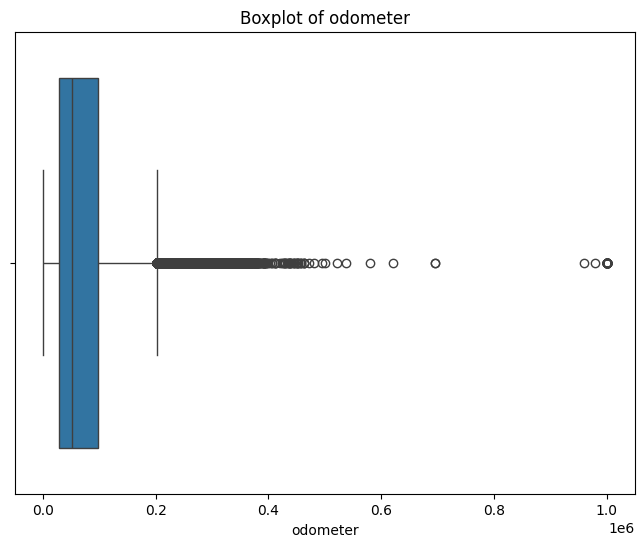

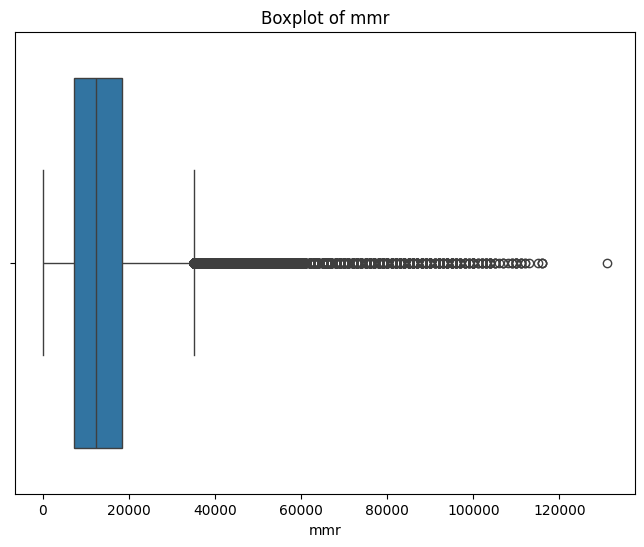

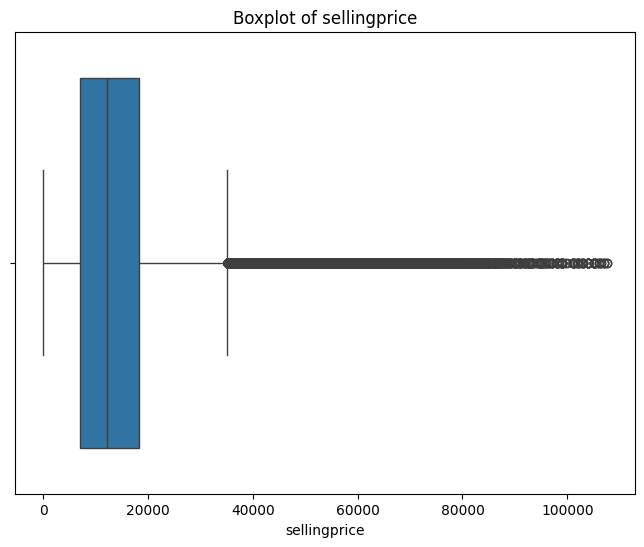

In [ ]:
numerical_cols = clean_df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=clean_df[col])
    plt.title('Boxplot of ' + col)
    plt.show()


In [ ]:
clean_df.describe()

,year,condition,odometer,mmr,sellingprice
count,545482.000000,545482.000000,545482.000000,545482.000000,545482.000000
mean,2010.141378,30.890556,67256.311352,13867.303137,13706.916533
std,3.887543,13.244643,52710.218661,9486.641929,9557.106416
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28062.000000,7325.000000,7100.000000
50%,2012.000000,35.000000,51124.000000,12350.000000,12250.000000
75%,2013.000000,41.000000,97502.750000,18400.000000,18300.000000
max,2015.000000,49.000000,999999.000000,131000.000000,107500.000000


Kami menghapus kolom 'saledate' karena kami menghadapi kesalahan di dalam kolom ini, dan kolom ini tidak akan membantu kami dalam analisis. Dalam analisis deret waktu, kolom ini bisa bermanfaat, tetapi kami tidak melakukan analisis deret waktu pada data ini.

In [ ]:
clean_df.drop(columns=['saledate'], inplace=True)

<ipython-input-148-8d887eca466f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns=['saledate'], inplace=True)


In [ ]:
clean_df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [ ]:
duplicate_rows = clean_df[clean_df.duplicated()]
duplicate_rows.sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
vin               0
state             0
condition       0.0
odometer        0.0
color             0
interior          0
seller            0
mmr             0.0
sellingprice    0.0
dtype: object

In [ ]:
clean_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


# **Data Visualisation**

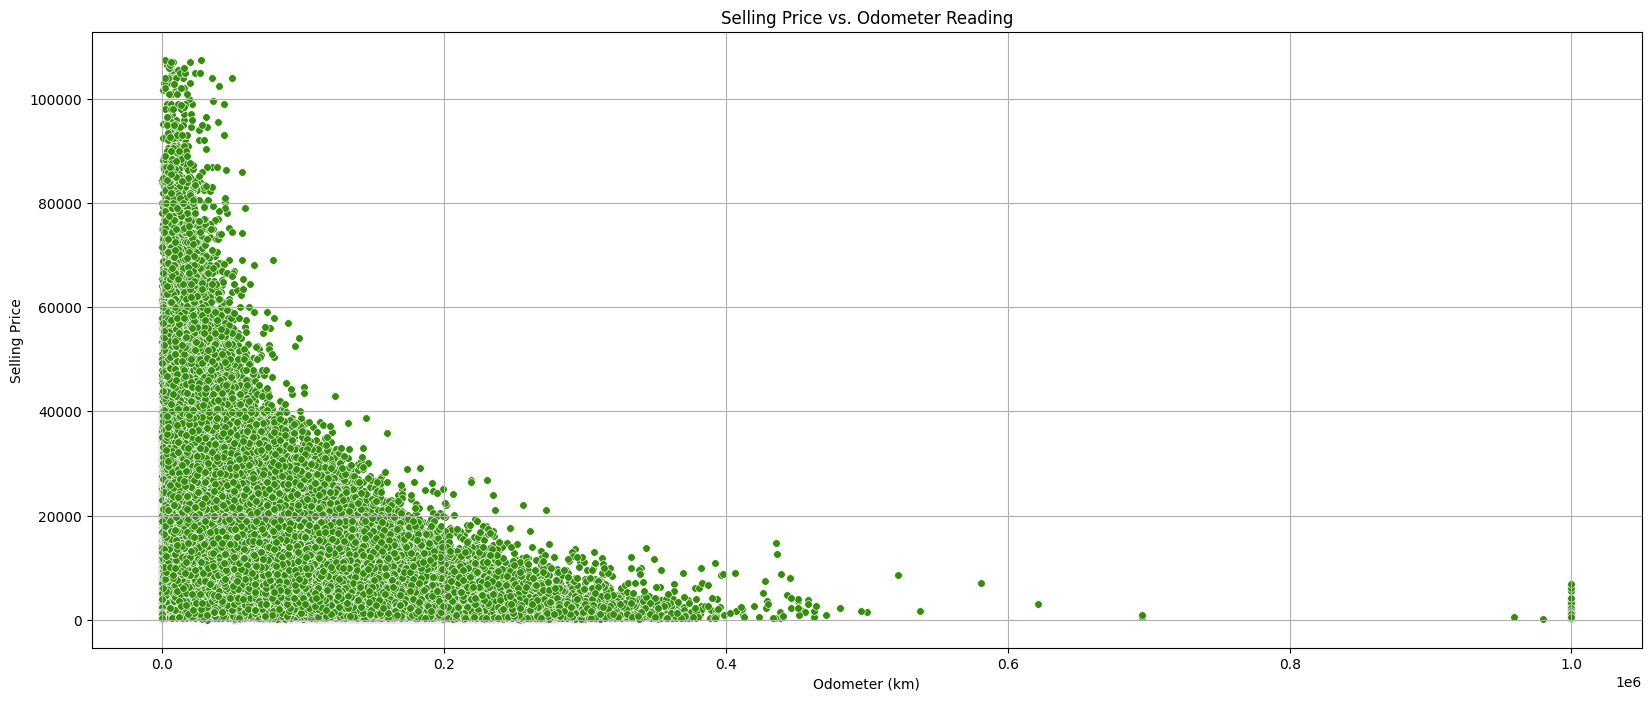

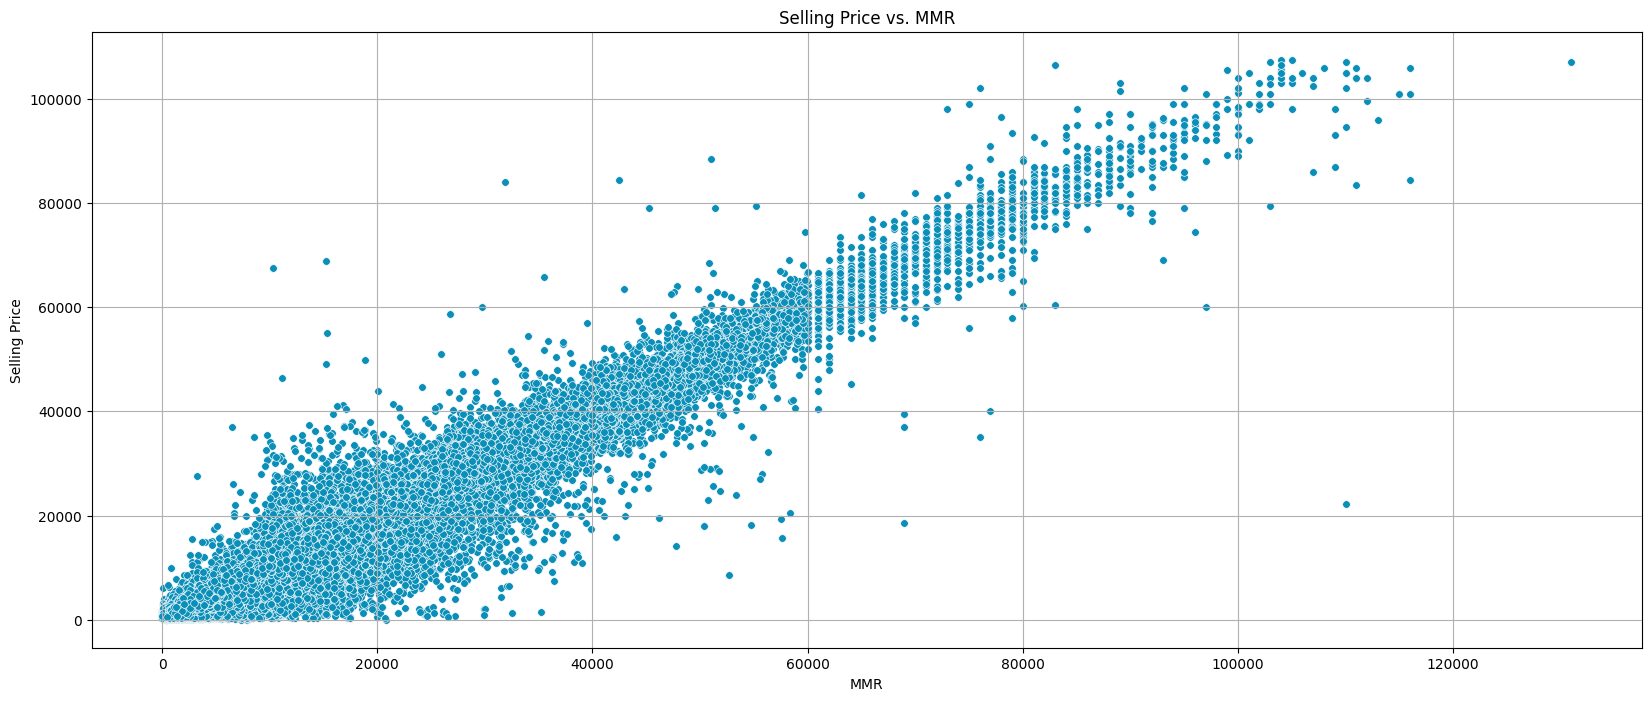

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(clean_df, x="odometer", y="sellingprice", color="#358D0C", s=30)
plt.xlabel("Odometer (km)")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Odometer Reading")
plt.grid(True)

plt.show()

plt.figure(figsize=(20,8))
sns.scatterplot(clean_df, x="mmr", y="sellingprice", color="#0B8FB9", s=30)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.grid(True)

plt.show()

<Axes: >

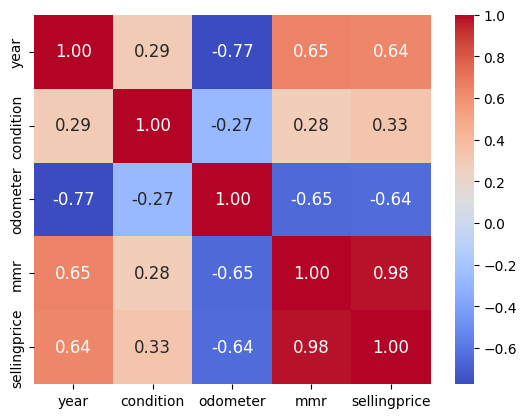

In [ ]:
numeric_df = clean_df.select_dtypes(include=['number'])

correlation_matrix = clean_df.select_dtypes(include=['number']).corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12}, xticklabels=1, yticklabels=1)

Ringkasan Temuan Korelasi:

* Odometer dan tahun: Korelasi negatif yang kuat
* MMR dan harga jual: Korelasi positif yang kuat
* MMR dan odometer: Korelasi negatif yang sedang
* Tahun dan harga jual: Korelasi positif yang sedang
* Harga jual dan odometer: Korelasi negatif yang sedang

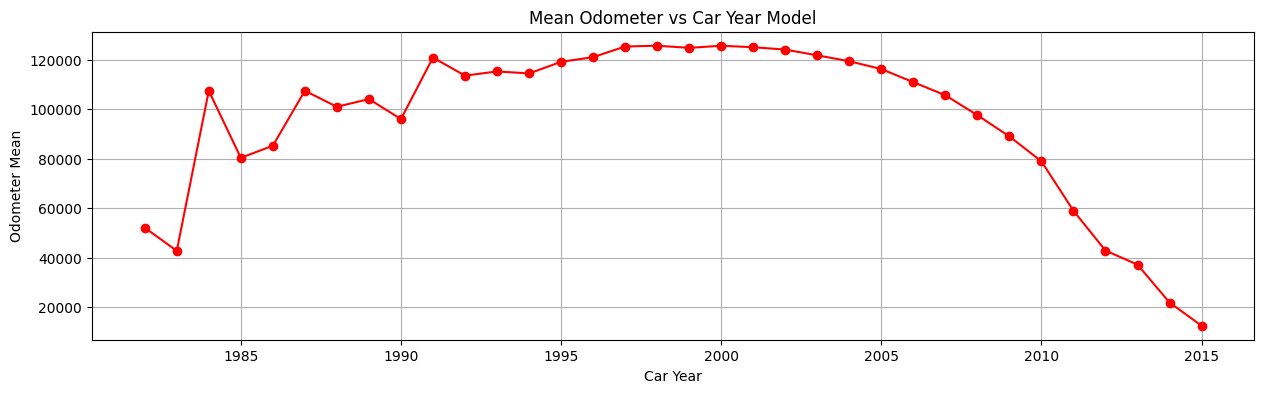

In [ ]:
mean_odometer_by_year = clean_df.groupby('year')['odometer'].mean()

plt.figure(figsize=(15, 4))
plt.plot(mean_odometer_by_year.index, mean_odometer_by_year.values, marker='o', color='red')
plt.title('Mean Odometer vs Car Year Model')
plt.xlabel('Car Year')
plt.ylabel('Odometer Mean')
plt.grid(True)
plt.show()

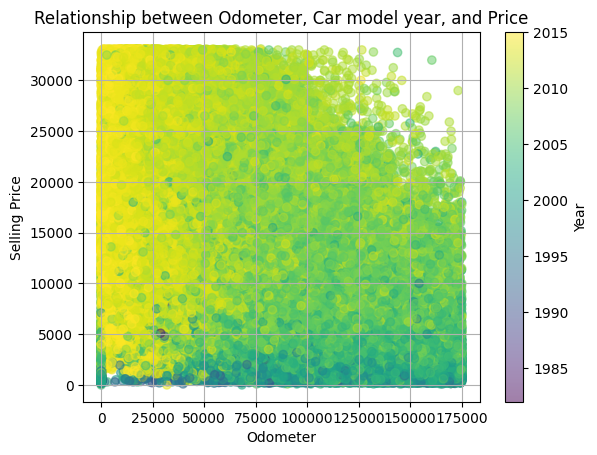

In [ ]:
scatter = plt.scatter(clean_df['odometer'], clean_df['sellingprice'], c=clean_df['year'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Year')
plt.title('Relationship between Odometer, Car model year, and Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

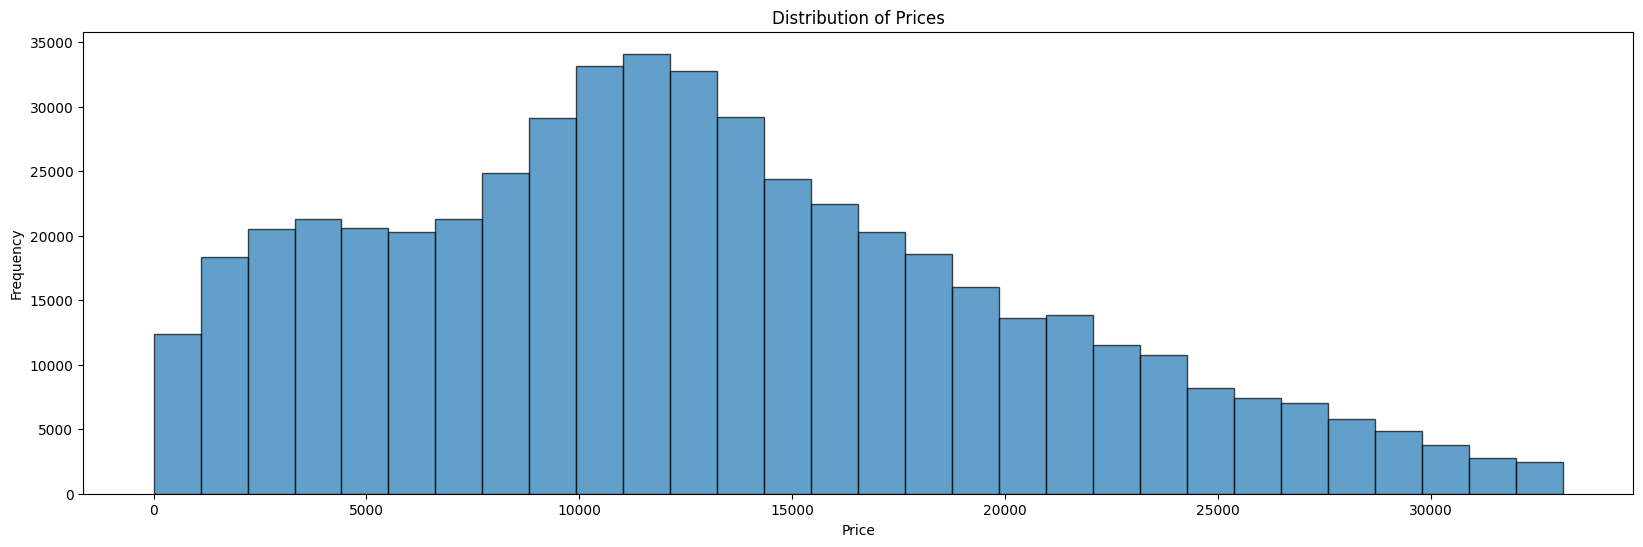

In [ ]:
plt.figure(figsize=(20, 6))
plt.hist(clean_df['sellingprice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

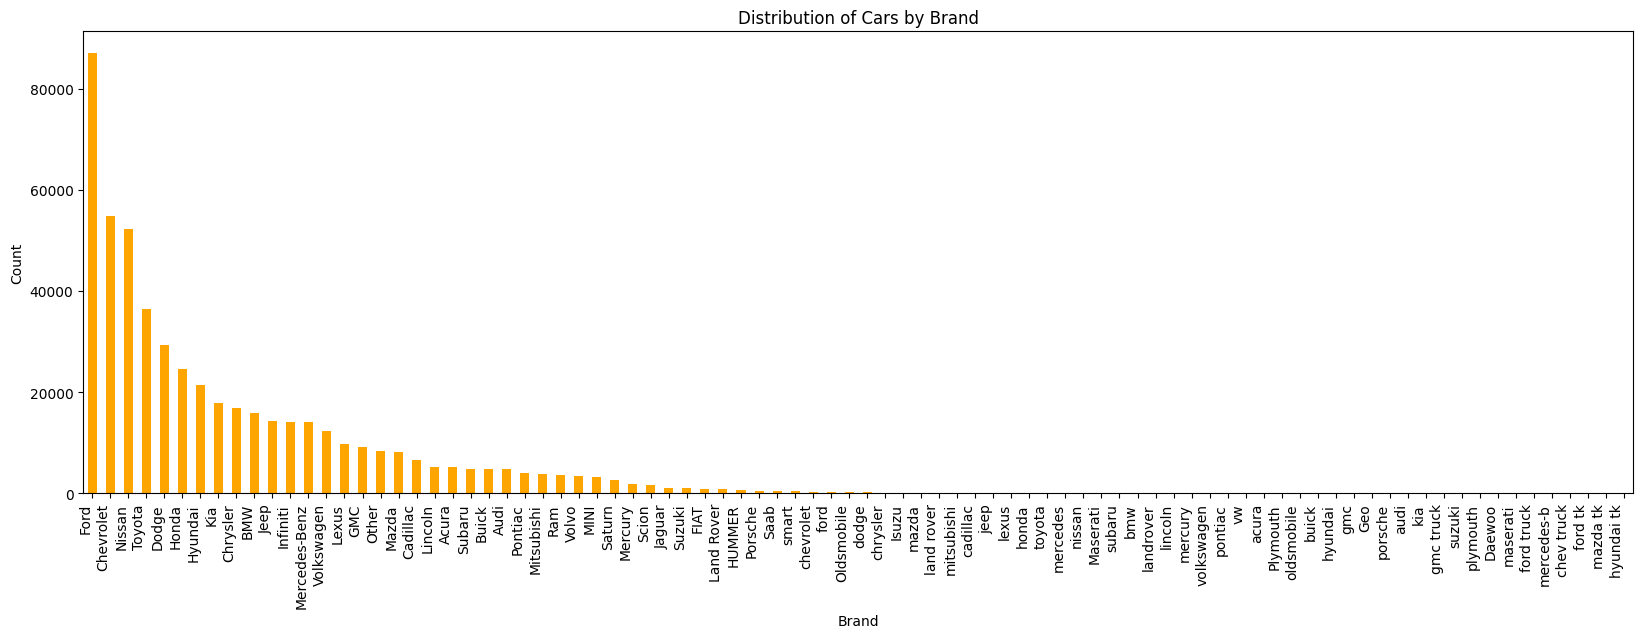

In [ ]:
plt.figure(figsize=(20, 6))

clean_df['make'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

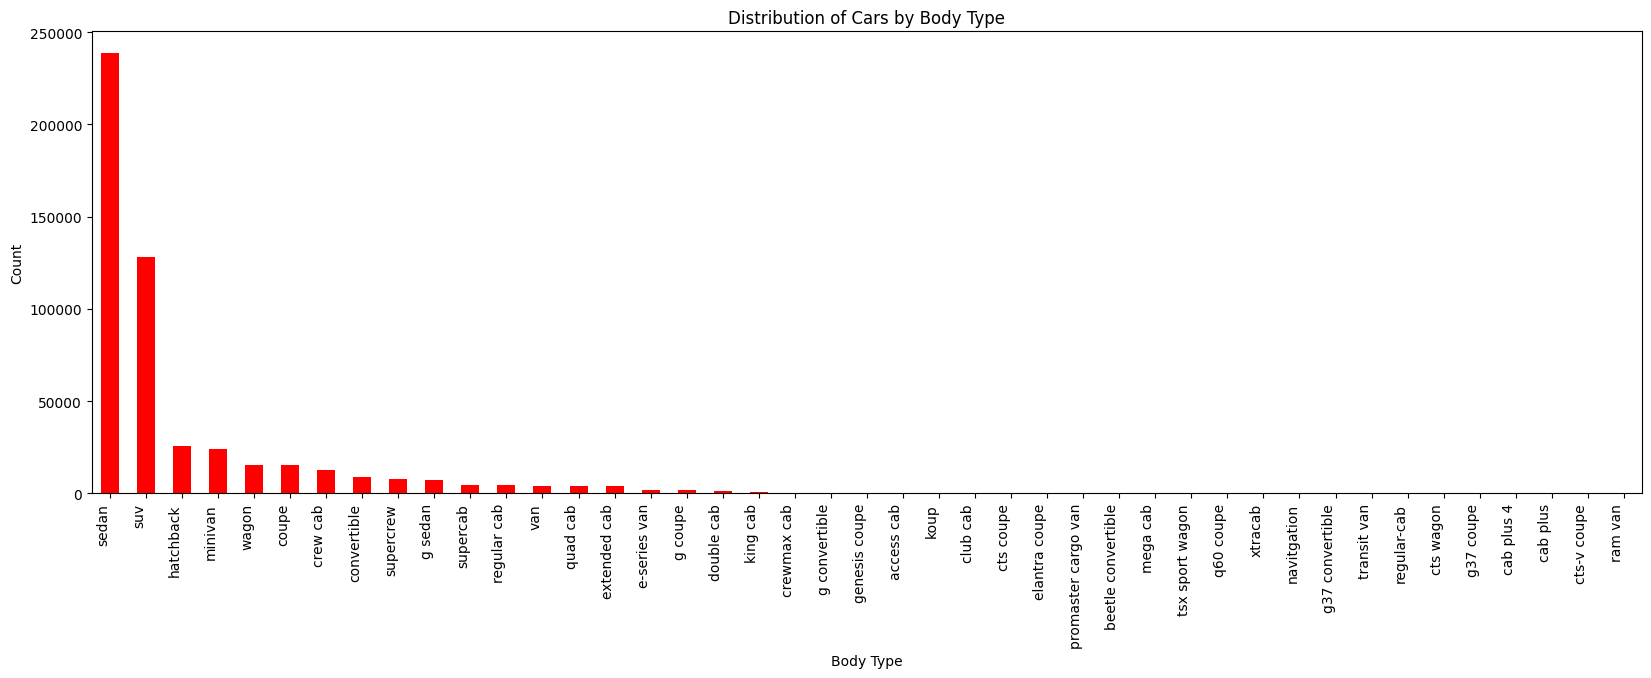

In [ ]:
plt.figure(figsize=(20, 6))
clean_df['body'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# **Feature Engineering**

In [ ]:
clean_df.drop(columns=['saledate', 'vin'], inplace=True)

<ipython-input-169-7455bc1cef6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns=['vin'], inplace=True)


In [ ]:
clean_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,kia,sorento,lx,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,kia,sorento,lx,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,bmw,3 series,328i sulev,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,volvo,s60,t5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


#### label encoder

In [ ]:
df_le = clean_df.copy()
categorical_cols = clean_df.select_dtypes(exclude=[np.number]).columns.tolist()

le = LabelEncoder()

for col in categorical_cols:
    df_le[col] = le.fit_transform(clean_df[col])

df_le.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,18,639,880,21,0,2,5.0,16639.0,16,1,7072,20500.0,21500.0
1,2015,18,639,880,21,0,2,5.0,9393.0,16,0,7072,20800.0,21500.0
2,2014,2,8,256,18,0,2,45.0,1331.0,7,1,4880,31900.0,30000.0
3,2015,41,585,1250,18,0,2,41.0,14282.0,16,1,13537,27500.0,27750.0
4,2014,2,32,338,18,0,2,43.0,2641.0,7,1,4880,66000.0,67000.0


Fitur numerik sudah dienkode dengan benar (float untuk kontinu, int untuk diskrit), tetapi fitur kategorikal perlu kita enkode sendiri.

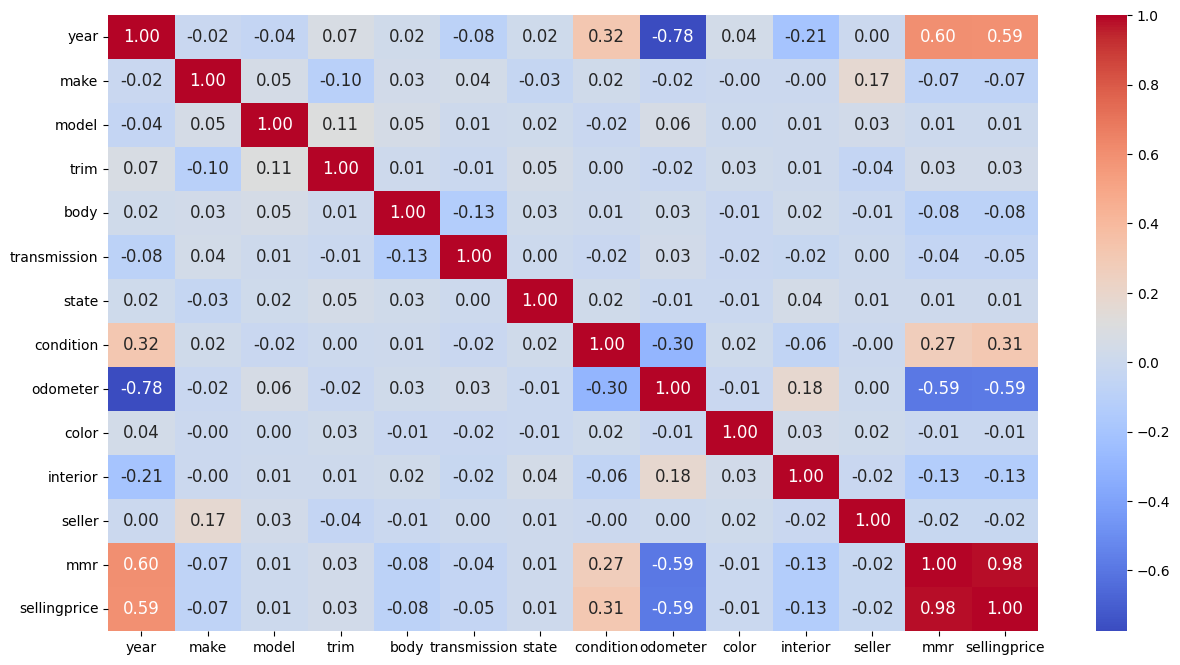

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_le.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12}, xticklabels=1, yticklabels=1)
plt.show()

In [ ]:
df2 = df_le.drop(columns=['state', 'color', 'seller'])
df2.head()

,year,make,model,trim,body,transmission,condition,odometer,interior,mmr,sellingprice
0,2015,18,639,880,21,0,5.0,16639.0,1,20500.0,21500.0
1,2015,18,639,880,21,0,5.0,9393.0,0,20800.0,21500.0
2,2014,2,8,256,18,0,45.0,1331.0,1,31900.0,30000.0
3,2015,41,585,1250,18,0,41.0,14282.0,1,27500.0,27750.0
4,2014,2,32,338,18,0,43.0,2641.0,1,66000.0,67000.0



Normalisasi fitur numerik menggunakan Min-Max Scaling dan enkode fitur kategorikal.

Parameter:
- df: DataFrame, DataFrame masukan yang berisi fitur numerik dan kategorikal.

Hasil:
- normalized_df: DataFrame, DataFrame yang telah dinormalisasi.
- scaler_dict: Kamus yang berisi objek MinMaxScaler untuk kolom numerik.
- label_encoders: Kamus yang berisi objek LabelEncoder untuk kolom kategorikal.






In [ ]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

df_scaled.head()

,year,make,model,trim,body,transmission,condition,odometer,interior,mmr,sellingprice
0,1.00,0.439024,0.835294,0.589417,0.913043,0.0,0.083333,0.016638,0.076923,0.156328,0.199993
1,1.00,0.439024,0.835294,0.589417,0.913043,0.0,0.083333,0.009392,0.000000,0.158618,0.199993
2,0.96,0.048780,0.010458,0.171467,0.782609,0.0,0.916667,0.001330,0.076923,0.243367,0.279063
3,1.00,1.000000,0.764706,0.837240,0.782609,0.0,0.833333,0.014281,0.076923,0.209773,0.258133
4,0.96,0.048780,0.041830,0.226390,0.782609,0.0,0.875000,0.002640,0.076923,0.503722,0.623252



Kita ingin melakukan pemilihan fitur dengan menggunakan semua kolom (baik numerik maupun kategorikal) tanpa harus menyebutkan fitur secara eksplisit. Salah satu pendekatan yang dapat menangani kedua jenis fitur adalah dengan menggunakan model berbasis pohon (seperti Random Forest) yang secara inheren mampu menangani campuran fitur numerik dan kategorikal. Atribut feature_importances_ dari model berbasis pohon dapat digunakan untuk pemilihan fitur.

In [ ]:
df_original = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

df_original.head()

,year,make,model,trim,body,transmission,condition,odometer,interior,mmr,sellingprice
0,2015.0,18.0,639.0,880.0,21.0,0.0,5.0,16639.0,1.0,20500.0,21500.0
1,2015.0,18.0,639.0,880.0,21.0,0.0,5.0,9393.0,0.0,20800.0,21500.0
2,2014.0,2.0,8.0,256.0,18.0,0.0,45.0,1331.0,1.0,31900.0,30000.0
3,2015.0,41.0,585.0,1250.0,18.0,0.0,41.0,14282.0,1.0,27500.0,27750.0
4,2014.0,2.0,32.0,338.0,18.0,0.0,43.0,2641.0,1.0,66000.0,67000.0


In [ ]:
test_data = {
    'year': [1.0],
    'make': [0.439024],
    'model': [0.835294],
    'trim': [0.589417],
    'body': [0.913043],
    'transmission': [0.0],
    'condition': [0.083333],
    'odometer': [0.016638],
    'interior': [0.076923],
    'mmr': [0.156328],
}

df2_cols = df2.columns.tolist()

# Tambahkan kolom yang hilang ke df_test

# Misalkan Anda memiliki DataFrame df_test yang berisi data yang telah dinormalisasi
df_test = pd.DataFrame(test_data)

for col in df2_cols:
    if col not in df_test.columns:
        df_test[col] = np.nan
# Dan misalkan scaler adalah objek MinMaxScaler yang Anda gunakan untuk normalisasi
df_test = pd.DataFrame(scaler.inverse_transform(df_test), columns=df_test.columns)

df_test.head()

,year,make,model,trim,body,transmission,condition,odometer,interior,mmr,sellingprice
0,2015.0,17.999984,638.99991,879.999581,20.999989,0.0,4.999984,16638.966724,0.999999,20500.0598,NaN


In [ ]:
df_test2_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

df_test2_scaled.head()

,year,make,model,trim,body,transmission,condition,odometer,interior,mmr,sellingprice
0,1.0,0.439024,0.835294,0.589417,0.913043,0.0,0.083333,0.016638,0.076923,0.156328,NaN


# **Modelling**

**Traning dan Testing Model**

In [ ]:
x = df_scaled.drop(['sellingprice'], axis=1)
y = df_scaled['sellingprice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (349108, 10) (349108,)
Validation set: (87277, 10) (87277,)
Test set: (109097, 10) (109097,)


**Apply Model**

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_logistic_test = linear_model.predict(x_test)
mse_logistic_test = mean_squared_error(y_test, y_pred_logistic_test)
r2_logistic_test = r2_score(y_test, y_pred_logistic_test)
mae_logistic_test = mean_absolute_error(y_test, y_pred_logistic_test)
y_val_pred_lr = linear_model.predict(x_val)
mse_rf = mean_squared_error(y_val, y_val_pred_lr)
print("Linear Regression Model:")
print("Validation Mean Squared Error:", mse_rf)
print("Mean Squared Error (MSE) on Test Data:", mse_logistic_test)
print("R-squared (R2) on Test Data:", r2_logistic_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_logistic_test)

Linear Regression Model:
Validation Mean Squared Error: 0.0002311616768755253
Mean Squared Error (MSE) on Test Data: 0.00022783399638464508
R-squared (R2) on Test Data: 0.9714512488368077
Mean Absolute Error (MAE) on Test Data: 0.009724755343943497


In [ ]:
# Lasso Model
lasso_model = Lasso(random_state=42)
lasso_model.fit(x_train, y_train)
y_pred_lasso_test = lasso_model.predict(x_test)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
y_val_pred_ls = lasso_model.predict(x_val)
mse_rf = mean_squared_error(y_val, y_val_pred_ls)
print("\nLasso Model:")
print("Validation Mean Squared Error:", mse_rf)
print("Mean Squared Error (MSE) on Test Data:", mse_lasso_test)
print("R-squared (R2) on Test Data:", r2_lasso_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_lasso_test)


Lasso Model:
Validation Mean Squared Error: 0.007912770981356605
Mean Squared Error (MSE) on Test Data: 0.007980530177063069
R-squared (R2) on Test Data: -7.627951843502956e-07
Mean Absolute Error (MAE) on Test Data: 0.06604333928004345


In [ ]:
# Ridge Model
ridge_model = Ridge(random_state=42)
ridge_model.fit(x_train, y_train)
y_pred_ridge_test = ridge_model.predict(x_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
y_val_pred_rg = ridge_model.predict(x_val)
mse_rf = mean_squared_error(y_val, y_val_pred_rg)
print("\nRidge Model:")
print("Validation Mean Squared Error:", mse_rf)
print("Mean Squared Error (MSE) on Test Data:", mse_ridge_test)
print("R-squared (R2) on Test Data:", r2_ridge_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_ridge_test)


Ridge Model:
Validation Mean Squared Error: 0.00023118682220096438
Mean Squared Error (MSE) on Test Data: 0.0002278667621067779
R-squared (R2) on Test Data: 0.9714471431262347
Mean Absolute Error (MAE) on Test Data: 0.009726924372174251


In [ ]:
# KNN Model
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
y_pred_knn_test = knn_model.predict(x_test)
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)
mae_knn_test = mean_absolute_error(y_test, y_pred_knn_test)
y_val_pred_knn = knn_model.predict(x_val)
mse_rf = mean_squared_error(y_val, y_val_pred_knn)
print("\nKNN Model:")
print("Validation Mean Squared Error:", mse_rf)
print("Mean Squared Error (MSE) on Test Data:", mse_knn_test)
print("R-squared (R2) on Test Data:", r2_knn_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_knn_test)


KNN Model:
Validation Mean Squared Error: 0.0003930217887840183
Mean Squared Error (MSE) on Test Data: 0.0004048766644935661
R-squared (R2) on Test Data: 0.9492669077932695
Mean Absolute Error (MAE) on Test Data: 0.012645194247044652


In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(x_train, y_train)
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)
y_val_pred_rf = rf_model.predict(x_val)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)
r2_rf_test = r2_score(y_test, y_test_pred_rf)
mae_rf_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print("\nRandom Forest Model:")
print("Validation Mean Squared Error:", mse_rf)
print("Mean Squared Error (MSE) on Test Data:", mse_rf_test)
print("R-squared (R2) on Test Data:", r2_rf_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_rf_test)


Random Forest Model:
Validation Mean Squared Error: 0.00019929821854622773
Mean Squared Error (MSE) on Test Data: 0.00019444427317984346
R-squared (R2) on Test Data: 0.9756351498977031
Mean Absolute Error (MAE) on Test Data: 0.008968111385754035


Berdasarkan evaluasi yang dilakukan terhadap model-model yang telah dibangun, model yang menonjol adalah Random Forest Model. Alasannya adalah:

- Performa Terbaik: Model Random Forest memiliki R-squared (R2) tertinggi sebesar 0.966 pada data uji, menunjukkan kemampuannya yang paling baik dalam menjelaskan variasi dalam data target.
- Kesalahan Prediksi Rendah: MSE dan MAE pada data uji lebih rendah dibandingkan dengan model lainnya, menunjukkan adanya kesalahan prediksi yang lebih rendah.
- Stabilitas Model: Model Random Forest cenderung lebih tahan terhadap overfitting dibandingkan dengan model lainnya, sehingga memberikan prediksi yang lebih konsisten pada data uji yang baru.
- Fleksibilitas dan Robustness: Random Forest mampu menangani berbagai jenis data dengan baik, termasuk data non-linear dan interaksi antara fitur, sehingga cocok untuk berbagai kasus pemodelan.

Oleh karena itu, berdasarkan analisis ini, model Random Forest merupakan pilihan terbaik untuk memprediksi harga kendaraan dalam dataset yang diberikan.

**Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse']
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print("Best Param", best_params)

In [ ]:
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)

y_train_pred_rf = best_rf_model.predict(x_train)
y_test_pred_rf = best_rf_model.predict(x_test)

y_val_pred_rf = best_rf_model.predict(x_val)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Random Forest Validation Mean Squared Error: {mse_rf}')

# Memperkirakan x_test and y_test adalah sebagai test data
y_pred_test = best_rf_model.predict(x_test)

# Evaluasi the model's performance on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R-squared (R2) on Test Data:", r2_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_test)

Untuk melakukan hyperparameter tuning ini membutuhkan waktu yang lama

In [ ]:
test_data = {
    'make': [524162],
    'model': [30],
    'trim': [412],
    'body': [236],
    'transmission': [34],
    'condition': [1],
    'odometer': [0.770833],
    'color': [0.211529],
    'interior': [40],
    'mmr': [1],
}

input_df = pd.DataFrame(test_data)

if hasattr(rf_model, 'feature_names_in_'):
    input_df = input_df[rf_model.feature_names_in_]
predicted_price = rf_model.predict(input_df)

print("Prediksi Harga:", predicted_price)

Prediksi Harga: [1032.27]


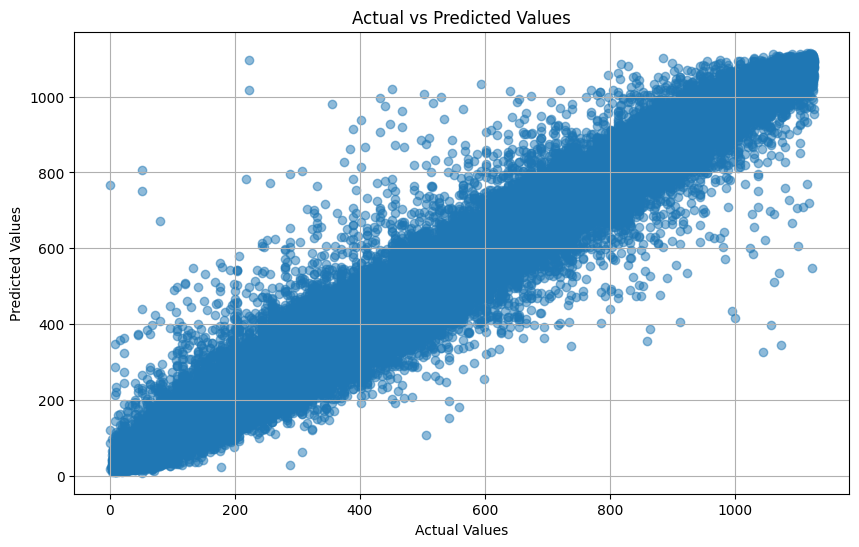

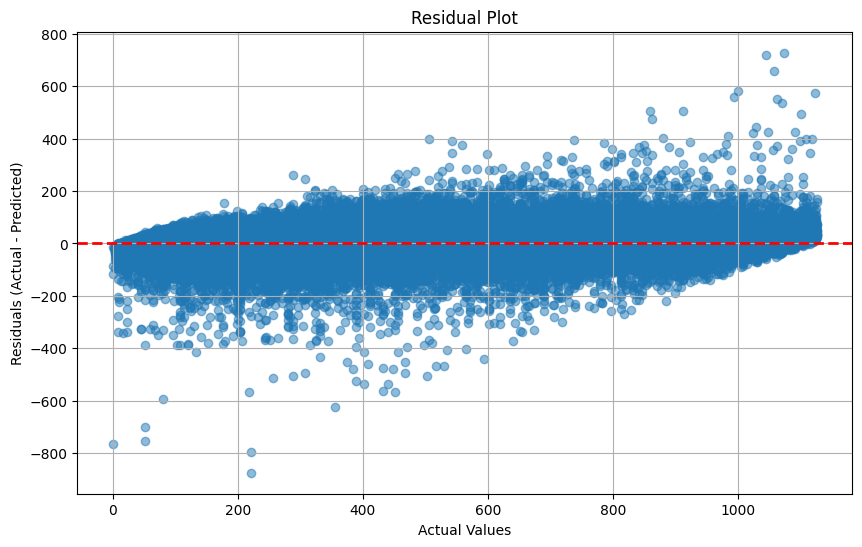

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_test_pred_rf
plt.figure(figsize=(10, 6))

plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

In [ ]:
clean_df.to_csv("data_mobil.csv", index=False)

In [ ]:
import pickle
with open("model_deploy.pkl", "wb") as file:
    pickle.dump(rf_model, file)

In [ ]:
import pickle
with open("model_deploy_lr.pkl", "wb") as file:
    pickle.dump(linear_model, file)